<h1> Исследование данных Train.csv и Test_1.csv </h1>

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
train_data = pd.read_csv('train.csv', sep=';', dtype={'Source': np.object, 'Destination': np.object,  
                                                     'Protocol': np.object, 'Length': np.int64, 'Source Port': np.int64,
                                                     'Dest Port': np.int64, 'Delta time': np.float64, 'Error': np.object})

In [13]:
train_data = train_data.fillna('delivered')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269126 entries, 0 to 269125
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Source       269126 non-null  object 
 1   Destination  269126 non-null  object 
 2   Protocol     269126 non-null  object 
 3   Length       269126 non-null  int64  
 4   Source Port  269126 non-null  int64  
 5   Dest Port    269126 non-null  int64  
 6   Delta time   269126 non-null  float64
 7   Error        269126 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 16.4+ MB


In [16]:
#Функция для перемешивания строк
train_data = train_data.sample(frac=1).reset_index(drop=True)

In [17]:
train_data.head()

,Source,Destination,Protocol,Length,Source Port,Dest Port,Delta time,Error
0,10.0.17.129,10.0.4.66,TCP,1518,36384,445,0.000001,retransmition
1,10.0.17.129,10.0.4.66,TCP,2966,36384,445,0.000004,tcp_out_of_order
2,10.0.17.129,10.0.4.66,TCP,1518,36384,445,0.000071,delivered
3,10.0.17.129,10.0.4.66,TCP,1518,36384,445,0.000002,retransmition
4,10.0.17.129,10.0.4.66,TCP,2966,36384,445,0.000005,tcp_out_of_order


In [21]:
#Введение словаря для Error
categories = {}

for key, value in enumerate(train_data['Error'].unique()):
    categories[value] = key + 1

train_data['Category_error_dic'] = train_data['Error'].map(categories)
train_data.corr()

,Length,Source Port,Dest Port,Delta time,Category_error_dic
Length,1.000000,0.636776,-0.749304,-0.274363,-0.566028
Source Port,0.636776,1.000000,-0.896721,-0.102307,-0.528808
Dest Port,-0.749304,-0.896721,1.000000,0.124476,0.562812
Delta time,-0.274363,-0.102307,0.124476,1.000000,0.283949
Category_error_dic,-0.566028,-0.528808,0.562812,0.283949,1.000000


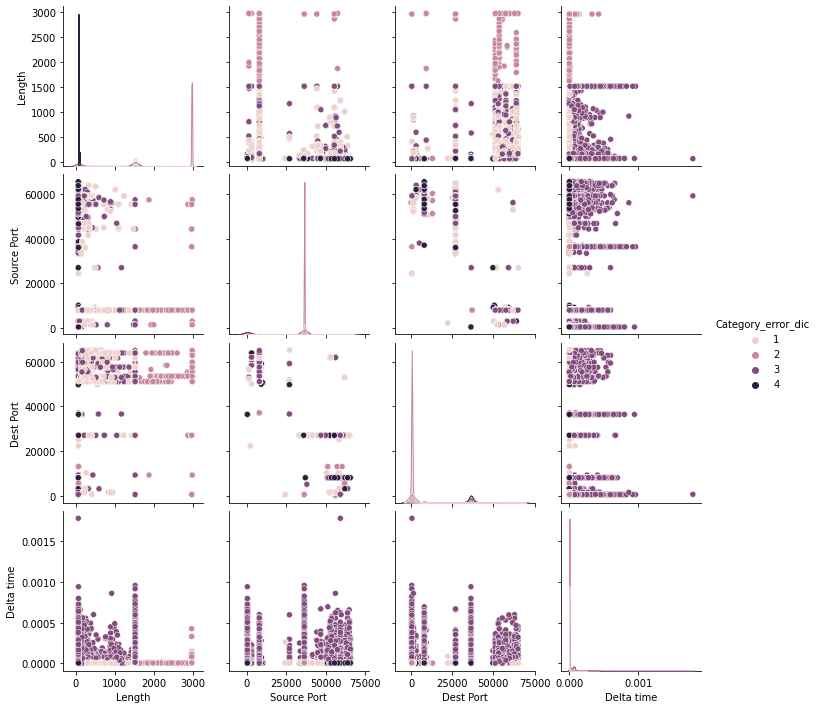

In [26]:
sns.pairplot(train_data, hue='Category_error_dic')